<a href="https://colab.research.google.com/github/cswangchen/colab-learning/blob/master/%E6%9F%A5%E7%9C%8Bcolab_GPU%E4%BF%A1%E6%81%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

size = 500
W = tf.random_normal([size, size], name='W')
X = tf.random_normal([size, size], name='X')
mul = tf.matmul(W, X, name='mul')
sum_result = tf.reduce_sum(mul, name='sum')

tfconfig = tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
     result = sess.run(sum_result)

/gpu:0 矩阵大小： 0 x 0  时间: 0.015099525451660156
/cpu:0 矩阵大小： 0 x 0  时间: 0.030559539794921875
/gpu:0 矩阵大小： 500 x 500  时间: 0.044699907302856445
/cpu:0 矩阵大小： 500 x 500  时间: 0.0674448013305664
/gpu:0 矩阵大小： 1000 x 1000  时间: 0.05358004570007324
/cpu:0 矩阵大小： 1000 x 1000  时间: 0.15126371383666992
/gpu:0 矩阵大小： 1500 x 1500  时间: 0.08785152435302734
/cpu:0 矩阵大小： 1500 x 1500  时间: 0.261735200881958
/gpu:0 矩阵大小： 2000 x 2000  时间: 0.043401241302490234
/cpu:0 矩阵大小： 2000 x 2000  时间: 0.5081934928894043
/gpu:0 矩阵大小： 2500 x 2500  时间: 0.05154013633728027
/cpu:0 矩阵大小： 2500 x 2500  时间: 0.8546779155731201
/gpu:0 矩阵大小： 3000 x 3000  时间: 0.12017989158630371
/cpu:0 矩阵大小： 3000 x 3000  时间: 1.249833345413208
/gpu:0 矩阵大小： 3500 x 3500  时间: 0.13335919380187988
/cpu:0 矩阵大小： 3500 x 3500  时间: 1.8675765991210938
/gpu:0 矩阵大小： 4000 x 4000  时间: 0.09919166564941406
/cpu:0 矩阵大小： 4000 x 4000  时间: 2.577393054962158
/gpu:0 矩阵大小： 4500 x 4500  时间: 0.16095900535583496
/cpu:0 矩阵大小： 4500 x 4500  时间: 3.549027919769287
/gpu:0 矩阵大小： 5000 x 5000

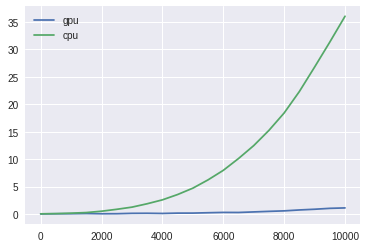

In [2]:
import tensorflow as tf
import time

def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size], name='W')
        X = tf.random_normal([size, size], name='X')
        mul = tf.matmul(W, X, name='mul')
        sum_result = tf.reduce_sum(mul, name='sum')
    
    startTime = time.time()
    tfconfig = tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
        
    takeTimes = time.time() - startTime
    print(device_name, "矩阵大小：",size,"x",size, " 时间:",takeTimes)
    return takeTimes


gpu_set = [];cpu_set = [];i_set = []
for i in range(0, 10001, 500):
    g = performanceTest("/gpu:0",i)
    c = performanceTest("/cpu:0",i)
    gpu_set.append(g)
    cpu_set.append(c)
    i_set.append(i)
    
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(i_set, gpu_set, label='gpu')
plt.plot(i_set, cpu_set, label='cpu')
plt.legend()

In [3]:
!/opt/bin/nvidia-smi

Sat Mar  2 06:23:51 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    61W / 149W |   2191MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2407593701605258213, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2989132355073120295
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14844254296947016797
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11276946637
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13718051038425570430
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]